<a href="https://colab.research.google.com/github/kmathapati/DS/blob/master/SLDR_Graph_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
slr = pd.read_csv('C:/Users/q1019844/Desktop/R_PD/SLDR_Analysis_Python/Trial_QA_Test_utf.csv',encoding = 'latin1',skip_blank_lines=True)

In [ ]:
slr['site'] = slr['site'].apply(str)

In [ ]:
#Bar plot: Distribution of SLDR Queries based on Siganal and Status (RED- Confirmatory, GREEN- DB Update)

In [ ]:
df2 = slr.groupby(['Signal', 'DB Status'])['Signal'].count().unstack('DB Status').fillna(0)

In [ ]:
A = list(df2.iloc[:,0])

In [ ]:
B = list(df2.iloc[:,1])

In [ ]:
C = [A, B]

In [ ]:
rows = list(df2.index)

In [ ]:
segments = 2

In [ ]:
ar1 = list(df2.iloc[0,:])
ar2 = list(df2.iloc[1,:])
ar3 = list(df2.iloc[2,:])
ary = [ar1, ar2, ar3]
myarray = np.asarray(ary)

In [ ]:
y_pos = np.arange(len(rows))

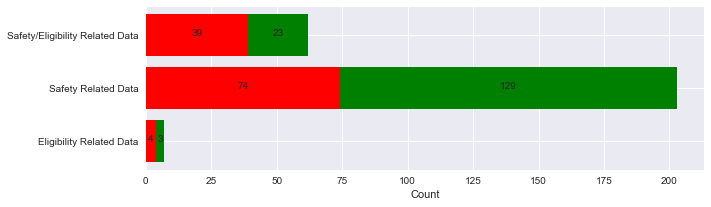

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
colors ='rgwm'
patch_handles = []
# left alignment of data starts at zero
left = np.zeros(len(rows))
for i, d in enumerate(C):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    left += d
    
# search all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y,  (myarray[i,j]), ha='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(rows)
ax.set_xlabel('Count')
plt.show()

In [ ]:
# Bar chart: Top 10 sites with High Query Count Statuswise Distribution (RED- Confirmatory, GREEN- DB Update)

In [ ]:
df3 = slr.groupby(['site', 'DB Status'])['site'].count().unstack('DB Status').fillna(0)

In [ ]:
df = slr.groupby(['site', 'DB Status'])['site'].count().unstack('DB Status').fillna(0)
df_ss = df.head(10)

In [ ]:
A1 = list(df_ss.iloc[:,0])
B1 = list(df_ss.iloc[:,1])
C1 = [A1, B1]

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = []
for i in x:
    ar = list(df_ss.iloc[i,:])
    a.append(ar)
a
myarray1 = np.asarray(a)

In [ ]:
rows1 = list(df_ss.index)

In [ ]:
seg = 2

In [ ]:
y_pos = np.arange(len(rows1))

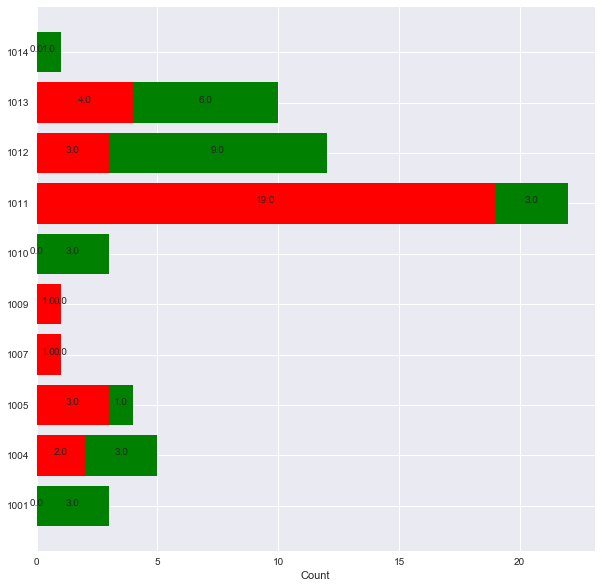

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
colors ='rgwm'
patch_handles = []
# left alignment of data starts at zero
left = np.zeros(len(rows1))
for i, d in enumerate(C1):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    left += d
    
# search all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y,  (myarray1[i,j]), ha='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(rows1)
ax.set_xlabel('Count')
plt.show()

In [ ]:
## Bar chart: Top 10 sites with High Query Count Signalwise Distribution (RED-Eligibility Related Data, GREEN-Safety Related Data, Yellow-Safety/Eligibility Related Data)

In [ ]:
df_sg = slr.groupby(['site', 'Signal'])['site'].count().unstack('Signal').fillna(0)
df_signal = df_sg.head(10)

In [ ]:
A_sg = list(df_signal.iloc[:,0])
B_sg = list(df_signal.iloc[:,1])
C_sg = list(df_signal.iloc[:,2])
Com = [A_sg, B_sg, C_sg]

In [ ]:
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = []
for i in y:
    b_ar = list(df_signal.iloc[i,:])
    b.append(b_ar)
b
myarray_sg = np.asarray(b)

In [ ]:
rows = list(df_signal.index)

In [ ]:
seg_sg = 2

In [ ]:
y_pos = np.arange(len(rows))

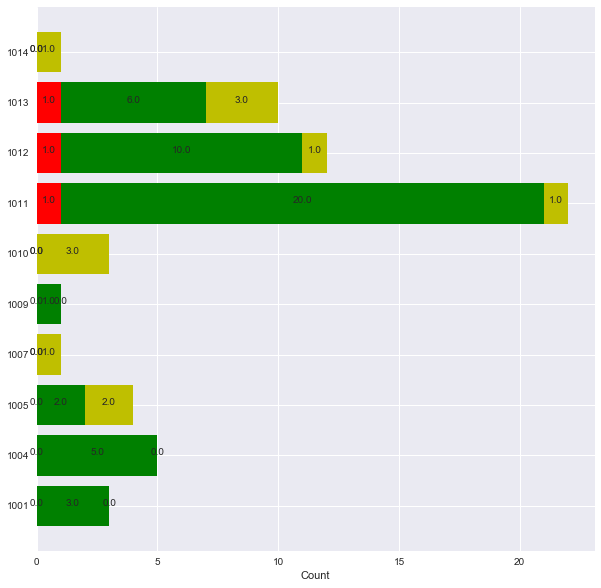

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
colors ='rgym'
patch_handles = []
# left alignment of data starts at zero
left = np.zeros(len(rows))
for i, d in enumerate(Com):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    left += d
    
# search all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y,  (myarray_sg[i,j]), ha='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(rows)
ax.set_xlabel('Count')
plt.show()

In [ ]:
#Pie plot: Distribution of SLDR Queries based on Signal

In [ ]:
pie_sources = slr.groupby('Signal').agg('count')
source_labels = pie_sources.Form.sort_values().index
source_counts = pie_sources.Form.sort_values()

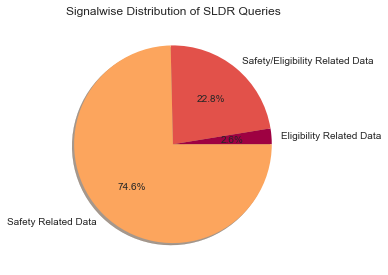

In [ ]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Signalwise Distribution of SLDR Queries')

source_pie = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)